In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

2023-08-14 10:28:38.120192: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-14 10:28:38.149031: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 10:28:38.553730: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-08-14 10:28:39.141415: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-14 10:28:39.161399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-14 10:28:39.161529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.iloc[:, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
y = df.iloc[:, [13]]
X = tf.convert_to_tensor(X)
y = tf.convert_to_tensor(y)

2023-08-14 10:28:39.396310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-14 10:28:39.396489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-14 10:28:39.396566: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
num_samples, attributes = df.shape
split_ratio = 0.85
split_index = int(num_samples * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [7]:
model = Sequential([
Input(shape=(10,)),
Dense(units=128, activation='relu'),
#Dense(units=64, activation='relu'),
#Dense(units=32, activation='relu'),
Dense(units=1, activation='sigmoid')
])        

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'],
              optimizer = tf.keras.optimizers.Adam(
                learning_rate=0.1
              ))

In [10]:
history = model.fit(
    X_train,
    y_train,
    epochs=10, validation_split=0.1)

Epoch 1/10


2023-08-14 10:28:40.521156: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa2d4002970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-14 10:28:40.521187: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-08-14 10:28:40.525244: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-14 10:28:40.618592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-14 10:28:40.689864: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


240/240 [==============================] - 2s 4ms/step - loss: 946.3726 - accuracy: 0.7757 - val_loss: 0.5335 - val_accuracy: 0.7776
Epoch 2/10
240/240 [==============================] - 1s 4ms/step - loss: 0.5092 - accuracy: 0.7941 - val_loss: 0.5326 - val_accuracy: 0.7776
Epoch 3/10
240/240 [==============================] - 1s 4ms/step - loss: 0.5105 - accuracy: 0.7941 - val_loss: 0.5303 - val_accuracy: 0.7776
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 0.5100 - accuracy: 0.7941 - val_loss: 0.5298 - val_accuracy: 0.7776
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 0.5118 - accuracy: 0.7941 - val_loss: 0.5334 - val_accuracy: 0.7776
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.5095 - accuracy: 0.7941 - val_loss: 0.5301 - val_accuracy: 0.7776
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 0.5101 - accuracy: 0.7941 - val_loss: 0.5303 - val_accuracy: 0.7776
Epoch 8/10
240/

In [11]:
model = Sequential([
Input(shape=(10,)),
Dense(units=128, activation='relu'),
Dense(units=64, activation='relu'),
#Dense(units=32, activation='relu'),
Dense(units=1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'],
              optimizer = tf.keras.optimizers.Adam(
                learning_rate=0.01
              ))
history1 = model.fit(
    X_train,
    y_train,
    epochs=20, validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
240/240 [==============================] - 2s 4ms/step - loss: 231.1250 - accuracy: 0.6928 - val_loss: 0.5606 - val_accuracy: 0.7776
Epoch 2/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5705 - accuracy: 0.7872 - val_loss: 0.5376 - val_accuracy: 0.7776
Epoch 3/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5150 - accuracy: 0.7941 - val_loss: 0.5284 - val_accuracy: 0.7776
Epoch 4/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5052 - accuracy: 0.7941 - val_loss: 0.5264 - val_accuracy: 0.7776
Epoch 5/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 0.7941 - val_loss: 0.5235 - val_accuracy: 0.7776
Epoch 6/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5045 - accuracy: 0.7941 - val_loss: 0.5237 - val_accuracy: 0.7776
Epoch 7/20
240/240 [==============================] - 1s 4ms/step - loss: 0.5057 - accuracy: 0.7941 - val_loss: 0.5253 - val_accuracy: 0.7776
Epoc

In [12]:
model = Sequential([
Input(shape=(10,)),
Dense(units=128, activation='relu'),
Dense(units=64, activation='relu'),
Dense(units=32, activation='relu'),
Dense(units=1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'],
              optimizer = tf.keras.optimizers.Adam(
                learning_rate=0.001
              ))
history2 = model.fit(
    X_train,
    y_train,
    epochs=30, validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/30
240/240 [==============================] - 1s 3ms/step - loss: 232.4405 - accuracy: 0.6759 - val_loss: 112.1646 - val_accuracy: 0.7400
Epoch 2/30
240/240 [==============================] - 1s 4ms/step - loss: 100.6570 - accuracy: 0.6799 - val_loss: 123.8605 - val_accuracy: 0.7776
Epoch 3/30
240/240 [==============================] - 1s 5ms/step - loss: 69.7683 - accuracy: 0.6773 - val_loss: 41.0462 - val_accuracy: 0.7553
Epoch 4/30
240/240 [==============================] - 1s 4ms/step - loss: 53.2362 - accuracy: 0.6741 - val_loss: 115.9130 - val_accuracy: 0.7765
Epoch 5/30
240/240 [==============================] - 1s 4ms/step - loss: 55.6787 - accuracy: 0.6769 - val_loss: 46.3126 - val_accuracy: 0.7776
Epoch 6/30
240/240 [==============================] - 1s 5ms/step - loss: 33.5390 - accuracy: 0.6769 - val_loss: 41.1197 - val_accuracy: 0.7776
Epoch 7/30
240/240 [==============================] - 1s 5ms/step - loss: 32.9458 - accuracy: 0.6761 - val_loss: 35.7397 - val_accu

In [13]:
model([X_train])

<tf.Tensor: shape=(8500, 1), dtype=float32, numpy=
array([[0.16515532],
       [0.23356098],
       [0.23356098],
       ...,
       [0.19982266],
       [0.23356098],
       [0.23356098]], dtype=float32)>

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

47/47 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.8180
Test Loss: 0.46872860193252563
Test Accuracy: 0.8180000185966492


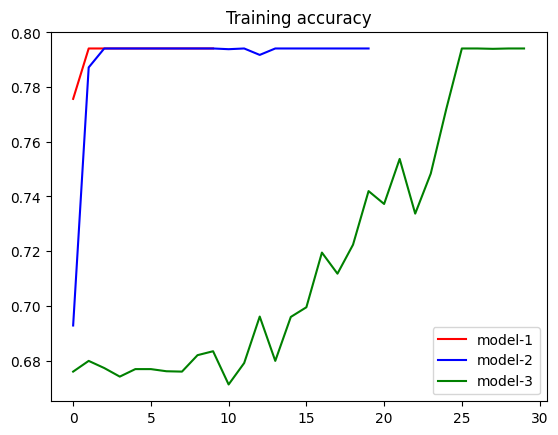

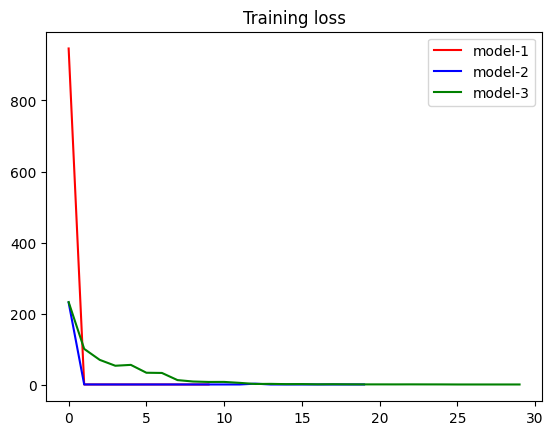

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))

accuracy_1 = history1.history['accuracy']
loss_1 = history1.history['loss']
epochs_1 = range(len(accuracy_1))

accuracy_2 = history2.history['accuracy']
loss_2 = history2.history['loss']
epochs_2 = range(len(accuracy_2))

plt.plot(epochs, accuracy, 'r', label='model-1')
plt.plot(epochs_1, accuracy_1, 'b', label='model-2')
plt.plot(epochs_2, accuracy_2, 'g', label='model-3')
plt.title('Training accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='model-1')
plt.plot(epochs_1, loss_1, 'b', label='model-2')
plt.plot(epochs_2, loss_2, 'g', label='model-3')
plt.title('Training loss')
plt.legend()
plt.show()